## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

# Adam, Epoch 加到 500

In [5]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 27s 550us/step - loss: 1.9293 - accuracy: 0.3061 - val_loss: 1.7855 - val_accuracy: 0.3648
Epoch 2/500
50000/50000 [==============================] - 25s 499us/step - loss: 1.7030 - accuracy: 0.3902 - val_loss: 1.6509 - val_accuracy: 0.4077
Epoch 3/500
50000/50000 [==============================] - 25s 493us/step - loss: 1.6112 - accuracy: 0.4252 - val_loss: 1.5802 - val_accuracy: 0.4401
Epoch 4/500
50000/50000 [==============================] - 27s 543us/step - loss: 1.5566 - accuracy: 0.4450 - val_loss: 1.5252 - val_accuracy: 0.4538
Epoch 5/500
50000/50000 [==============================] - 25s 500us/step - loss: 1.5001 - accuracy: 0.4645 - val_loss: 1.5059 - val_accuracy: 0.4721
Epoch 6/500
50000/50000 [==============================] - 25s 502us/step - loss: 1.4634 - accuracy: 0.4810 - val_loss: 1.4867 - val_accuracy: 0.4660
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.5594 - accuracy: 0.8009 - val_loss: 1.9311 - val_accuracy: 0.5148
Epoch 56/500
50000/50000 [==============================] - 21s 424us/step - loss: 0.5526 - accuracy: 0.8024 - val_loss: 2.0229 - val_accuracy: 0.5023
Epoch 57/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.5427 - accuracy: 0.8071 - val_loss: 1.9926 - val_accuracy: 0.5153
Epoch 58/500
50000/50000 [==============================] - 21s 430us/step - loss: 0.5343 - accuracy: 0.8085 - val_loss: 2.0608 - val_accuracy: 0.5071
Epoch 59/500
50000/50000 [==============================] - 22s 442us/step - loss: 0.5254 - accuracy: 0.8111 - val_loss: 2.0624 - val_accuracy: 0.5109
Epoch 60/500
50000/50000 [==============================] - 22s 435us/step - loss: 0.4860 - accuracy: 0.8268 - val_loss: 2.0837 - val_accuracy: 0.5260
Epoch 61/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.5124 - ac

50000/50000 [==============================] - 21s 417us/step - loss: 0.2544 - accuracy: 0.9072 - val_loss: 3.5832 - val_accuracy: 0.5008
Epoch 110/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.2236 - accuracy: 0.9214 - val_loss: 3.6941 - val_accuracy: 0.4992
Epoch 111/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.2459 - accuracy: 0.9121 - val_loss: 3.6564 - val_accuracy: 0.4986
Epoch 112/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.2391 - accuracy: 0.9141 - val_loss: 3.8333 - val_accuracy: 0.4935
Epoch 113/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.2637 - accuracy: 0.9054 - val_loss: 3.8820 - val_accuracy: 0.4865
Epoch 114/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.2465 - accuracy: 0.9110 - val_loss: 3.7049 - val_accuracy: 0.5015
Epoch 115/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.2137 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.2139 - accuracy: 0.9261 - val_loss: 4.9769 - val_accuracy: 0.4908
Epoch 164/500
50000/50000 [==============================] - 21s 415us/step - loss: 0.1211 - accuracy: 0.9569 - val_loss: 4.9948 - val_accuracy: 0.5009
Epoch 165/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.1104 - accuracy: 0.9610 - val_loss: 5.0014 - val_accuracy: 0.4973
Epoch 166/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.1297 - accuracy: 0.9544 - val_loss: 5.0261 - val_accuracy: 0.4945
Epoch 167/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.2042 - accuracy: 0.9298 - val_loss: 5.0434 - val_accuracy: 0.4918
Epoch 168/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.1752 - accuracy: 0.9373 - val_loss: 5.0483 - val_accuracy: 0.4904
Epoch 169/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.19

Epoch 217/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0723 - accuracy: 0.9754 - val_loss: 5.8961 - val_accuracy: 0.4943
Epoch 218/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.0702 - accuracy: 0.9759 - val_loss: 5.8745 - val_accuracy: 0.4992
Epoch 219/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.1511 - accuracy: 0.9498 - val_loss: 5.7526 - val_accuracy: 0.4938
Epoch 220/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.2437 - accuracy: 0.9217 - val_loss: 5.9779 - val_accuracy: 0.4889
Epoch 221/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.1615 - accuracy: 0.9466 - val_loss: 5.7982 - val_accuracy: 0.5003
Epoch 222/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.1047 - accuracy: 0.9638 - val_loss: 6.1249 - val_accuracy: 0.4909
Epoch 223/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.08

Epoch 271/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0771 - accuracy: 0.9734 - val_loss: 6.3815 - val_accuracy: 0.4974
Epoch 272/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.1067 - accuracy: 0.9627 - val_loss: 6.4202 - val_accuracy: 0.4958
Epoch 273/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.1105 - accuracy: 0.9624 - val_loss: 6.4489 - val_accuracy: 0.4892
Epoch 274/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.1485 - accuracy: 0.9502 - val_loss: 6.5225 - val_accuracy: 0.4891
Epoch 275/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.1272 - accuracy: 0.9588 - val_loss: 6.4980 - val_accuracy: 0.4872
Epoch 276/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.1067 - accuracy: 0.9635 - val_loss: 6.3603 - val_accuracy: 0.4949
Epoch 277/500
50000/50000 [==============================] - 21s 425us/step - loss: 0.07

Epoch 325/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.0690 - accuracy: 0.9761 - val_loss: 6.7419 - val_accuracy: 0.4983
Epoch 326/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.0985 - accuracy: 0.9668 - val_loss: 6.8213 - val_accuracy: 0.4839
Epoch 327/500
50000/50000 [==============================] - 22s 448us/step - loss: 0.0986 - accuracy: 0.9666 - val_loss: 6.7507 - val_accuracy: 0.4928
Epoch 328/500
50000/50000 [==============================] - 22s 439us/step - loss: 0.1125 - accuracy: 0.9633 - val_loss: 7.0031 - val_accuracy: 0.4860
Epoch 329/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.1369 - accuracy: 0.9566 - val_loss: 6.7866 - val_accuracy: 0.4964
Epoch 330/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0735 - accuracy: 0.9753 - val_loss: 6.7481 - val_accuracy: 0.4930
Epoch 331/500
50000/50000 [==============================] - 21s 424us/step - loss: 0.08

Epoch 379/500
50000/50000 [==============================] - 22s 438us/step - loss: 0.3188 - accuracy: 0.9123 - val_loss: 6.2144 - val_accuracy: 0.4907
Epoch 380/500
50000/50000 [==============================] - 23s 451us/step - loss: 0.0982 - accuracy: 0.9683 - val_loss: 6.5348 - val_accuracy: 0.5026
Epoch 381/500
50000/50000 [==============================] - 22s 444us/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 6.5151 - val_accuracy: 0.5053
Epoch 382/500
50000/50000 [==============================] - 22s 445us/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 6.7219 - val_accuracy: 0.5024
Epoch 383/500
50000/50000 [==============================] - 22s 444us/step - loss: 0.0161 - accuracy: 0.9959 - val_loss: 6.8243 - val_accuracy: 0.5065
Epoch 384/500
50000/50000 [==============================] - 22s 447us/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 6.9477 - val_accuracy: 0.5028
Epoch 385/500
50000/50000 [==============================] - 23s 455us/step - loss: 0.00

Epoch 433/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.3128 - accuracy: 0.9118 - val_loss: 6.1875 - val_accuracy: 0.4941
Epoch 434/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.0607 - accuracy: 0.9805 - val_loss: 6.2586 - val_accuracy: 0.4978
Epoch 435/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 6.5075 - val_accuracy: 0.4996
Epoch 436/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.0122 - accuracy: 0.9977 - val_loss: 6.5529 - val_accuracy: 0.5019
Epoch 437/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.0073 - accuracy: 0.9991 - val_loss: 6.6158 - val_accuracy: 0.5043
Epoch 438/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 6.7486 - val_accuracy: 0.5069
Epoch 439/500
50000/50000 [==============================] - 21s 425us/step - loss: 0.00

Epoch 487/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.2850 - val_accuracy: 0.5102
Epoch 488/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 6.3444 - val_accuracy: 0.5105
Epoch 489/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 6.4169 - val_accuracy: 0.5069
Epoch 490/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 6.6053 - val_accuracy: 0.5013
Epoch 491/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.7470 - accuracy: 0.8220 - val_loss: 4.7765 - val_accuracy: 0.4834
Epoch 492/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.1003 - accuracy: 0.9654 - val_loss: 5.2010 - val_accuracy: 0.5018
Epoch 493/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.04

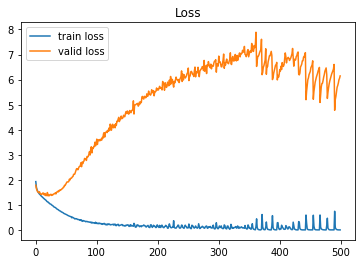

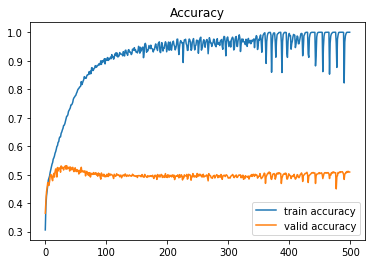

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# SGD, Epoch 500

In [8]:
model = build_mlp()

In [9]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 370us/step - loss: 2.2653 - accuracy: 0.1535 - val_loss: 2.2127 - val_accuracy: 0.2002
Epoch 2/500
50000/50000 [==============================] - 18s 361us/step - loss: 2.1810 - accuracy: 0.2263 - val_loss: 2.1500 - val_accuracy: 0.2419
Epoch 3/500
50000/50000 [==============================] - 18s 356us/step - loss: 2.1276 - accuracy: 0.2553 - val_loss: 2.1038 - val_accuracy: 0.2686
Epoch 4/500
50000/50000 [==============================] - 18s 361us/step - loss: 2.0855 - accuracy: 0.2731 - val_loss: 2.0655 - val_accuracy: 0.2852
Epoch 5/500
50000/50000 [==============================] - 18s 363us/step - loss: 2.0500 - accuracy: 0.2865 - val_loss: 2.0328 - val_accuracy: 0.2950
Epoch 6/500
50000/50000 [==============================] - 18s 364us/step - loss: 2.0193 - accuracy: 0.2957 - val_loss: 2.0049 - val_accuracy: 0.3045
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.6735 - accuracy: 0.4184 - val_loss: 1.6806 - val_accuracy: 0.4107
Epoch 56/500
50000/50000 [==============================] - 16s 319us/step - loss: 1.6704 - accuracy: 0.4202 - val_loss: 1.6781 - val_accuracy: 0.4129
Epoch 57/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.6675 - accuracy: 0.4200 - val_loss: 1.6756 - val_accuracy: 0.4157
Epoch 58/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.6645 - accuracy: 0.4222 - val_loss: 1.6725 - val_accuracy: 0.4140
Epoch 59/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.6613 - accuracy: 0.4216 - val_loss: 1.6744 - val_accuracy: 0.4130
Epoch 60/500
50000/50000 [==============================] - 17s 331us/step - loss: 1.6585 - accuracy: 0.4226 - val_loss: 1.6674 - val_accuracy: 0.4149
Epoch 61/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.6558 - ac

50000/50000 [==============================] - 16s 321us/step - loss: 1.5413 - accuracy: 0.4627 - val_loss: 1.5644 - val_accuracy: 0.4532
Epoch 110/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.5393 - accuracy: 0.4637 - val_loss: 1.5641 - val_accuracy: 0.4538
Epoch 111/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.5374 - accuracy: 0.4639 - val_loss: 1.5640 - val_accuracy: 0.4517
Epoch 112/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.5357 - accuracy: 0.4644 - val_loss: 1.5588 - val_accuracy: 0.4530
Epoch 113/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.5338 - accuracy: 0.4648 - val_loss: 1.5571 - val_accuracy: 0.4527
Epoch 114/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.5317 - accuracy: 0.4663 - val_loss: 1.5589 - val_accuracy: 0.4563
Epoch 115/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.5300 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.4509 - accuracy: 0.4942 - val_loss: 1.4971 - val_accuracy: 0.4749
Epoch 164/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.4490 - accuracy: 0.4941 - val_loss: 1.4931 - val_accuracy: 0.4773
Epoch 165/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.4477 - accuracy: 0.4948 - val_loss: 1.4955 - val_accuracy: 0.4749
Epoch 166/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.4460 - accuracy: 0.4948 - val_loss: 1.4933 - val_accuracy: 0.4767
Epoch 167/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.4448 - accuracy: 0.4958 - val_loss: 1.4966 - val_accuracy: 0.4738
Epoch 168/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.4431 - accuracy: 0.4959 - val_loss: 1.4887 - val_accuracy: 0.4768
Epoch 169/500
50000/50000 [==============================] - 17s 332us/step - loss: 1.44

Epoch 217/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.3745 - accuracy: 0.5205 - val_loss: 1.4451 - val_accuracy: 0.4909
Epoch 218/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.3732 - accuracy: 0.5209 - val_loss: 1.4452 - val_accuracy: 0.4910
Epoch 219/500
50000/50000 [==============================] - 16s 330us/step - loss: 1.3718 - accuracy: 0.5213 - val_loss: 1.4414 - val_accuracy: 0.4910
Epoch 220/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.3706 - accuracy: 0.5216 - val_loss: 1.4411 - val_accuracy: 0.4909
Epoch 221/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.3694 - accuracy: 0.5215 - val_loss: 1.4424 - val_accuracy: 0.4893
Epoch 222/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.3678 - accuracy: 0.5226 - val_loss: 1.4416 - val_accuracy: 0.4904
Epoch 223/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.36

Epoch 271/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.3052 - accuracy: 0.5434 - val_loss: 1.4143 - val_accuracy: 0.4999
Epoch 272/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.3041 - accuracy: 0.5435 - val_loss: 1.4019 - val_accuracy: 0.5049
Epoch 273/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.3029 - accuracy: 0.5444 - val_loss: 1.4023 - val_accuracy: 0.5039
Epoch 274/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.3018 - accuracy: 0.5449 - val_loss: 1.4024 - val_accuracy: 0.5046
Epoch 275/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.3006 - accuracy: 0.5452 - val_loss: 1.3991 - val_accuracy: 0.5042
Epoch 276/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.2994 - accuracy: 0.5456 - val_loss: 1.3992 - val_accuracy: 0.5029
Epoch 277/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.29

Epoch 325/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.2398 - accuracy: 0.5658 - val_loss: 1.4125 - val_accuracy: 0.4989
Epoch 326/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.2395 - accuracy: 0.5654 - val_loss: 1.3760 - val_accuracy: 0.5144
Epoch 327/500
50000/50000 [==============================] - 17s 330us/step - loss: 1.2375 - accuracy: 0.5651 - val_loss: 1.3806 - val_accuracy: 0.5107
Epoch 328/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.2365 - accuracy: 0.5665 - val_loss: 1.3743 - val_accuracy: 0.5129
Epoch 329/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.2353 - accuracy: 0.5680 - val_loss: 1.3770 - val_accuracy: 0.5128
Epoch 330/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.2346 - accuracy: 0.5689 - val_loss: 1.3762 - val_accuracy: 0.5118
Epoch 331/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.23

Epoch 379/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.1796 - accuracy: 0.5866 - val_loss: 1.3514 - val_accuracy: 0.5227
Epoch 380/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.1776 - accuracy: 0.5892 - val_loss: 1.3529 - val_accuracy: 0.5206
Epoch 381/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.1772 - accuracy: 0.5885 - val_loss: 1.3715 - val_accuracy: 0.5116
Epoch 382/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.1762 - accuracy: 0.5887 - val_loss: 1.3522 - val_accuracy: 0.5190
Epoch 383/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.1752 - accuracy: 0.5885 - val_loss: 1.3565 - val_accuracy: 0.5210
Epoch 384/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.1737 - accuracy: 0.5881 - val_loss: 1.3516 - val_accuracy: 0.5203
Epoch 385/500
50000/50000 [==============================] - 17s 333us/step - loss: 1.17

Epoch 433/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.1214 - accuracy: 0.6097 - val_loss: 1.3471 - val_accuracy: 0.5272
Epoch 434/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.1205 - accuracy: 0.6087 - val_loss: 1.3449 - val_accuracy: 0.5211
Epoch 435/500
50000/50000 [==============================] - 17s 331us/step - loss: 1.1203 - accuracy: 0.6095 - val_loss: 1.3457 - val_accuracy: 0.5257
Epoch 436/500
50000/50000 [==============================] - 16s 327us/step - loss: 1.1208 - accuracy: 0.6080 - val_loss: 1.3527 - val_accuracy: 0.5177
Epoch 437/500
50000/50000 [==============================] - 16s 327us/step - loss: 1.1168 - accuracy: 0.6099 - val_loss: 1.3465 - val_accuracy: 0.5297
Epoch 438/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.1182 - accuracy: 0.6093 - val_loss: 1.3488 - val_accuracy: 0.5250
Epoch 439/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.11

Epoch 487/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.0655 - accuracy: 0.6273 - val_loss: 1.3302 - val_accuracy: 0.5290
Epoch 488/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.0663 - accuracy: 0.6275 - val_loss: 1.3731 - val_accuracy: 0.5158
Epoch 489/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.0642 - accuracy: 0.6299 - val_loss: 1.3445 - val_accuracy: 0.5293
Epoch 490/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.0654 - accuracy: 0.6282 - val_loss: 1.3561 - val_accuracy: 0.5230
Epoch 491/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.0612 - accuracy: 0.6298 - val_loss: 1.3583 - val_accuracy: 0.5210
Epoch 492/500
50000/50000 [==============================] - 16s 330us/step - loss: 1.0619 - accuracy: 0.6297 - val_loss: 1.3745 - val_accuracy: 0.5212
Epoch 493/500
50000/50000 [==============================] - 17s 332us/step - loss: 1.06

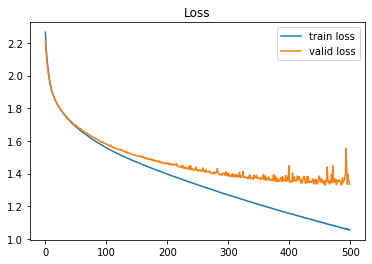

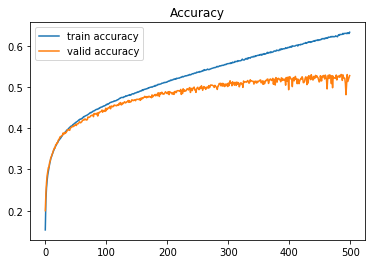

In [11]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()